In [1]:
%matplotlib inline

In [3]:
data_dir = '/scr/ilz1/cbspython_surf/data/' 
# if you work on your personal computer set this to the directory where you downloaded the data

# And if I didn't even use FreeSurfer ?

### ASCII coded surface formats can be read / written with pandas (e.g. vtk)

Very helpful blog post on ASCII surface file formats

http://brainder.org/2011/09/25/braindering-with-ascii-files/

Github repo with some functions that use pandas to read/write surface files

https://github.com/juhuntenburg/brainsurfacescripts/blob/master/vtk_rw.py

In [4]:
from vtk_rw import read_vtk, write_vtk
import numpy as np

In [5]:
statmap_file = data_dir+'statmap_rh.vtk'
rest_file = data_dir+'rest_rh.vtk'

The files are ASCII coded so you can look at them in a text editor. The read/write vtk functions make use of pandas ability to find keywords in these files and then load the data that follows these keywords

In [6]:
# reading vtk files
vertices_map, faces_map, data_map = read_vtk(statmap_file)

In [7]:
vertices_rest, faces_rest, data_rest =read_vtk(rest_file)

In [8]:
print vertices_map.shape
print vertices_rest.shape
print faces_map.shape
print faces_rest.shape
print data_map.shape
print data_rest.shape

(10242, 3)
(10242, 3)
(20480, 3)
(20480, 3)
(10242, 1)
(10242, 116)


Vertices and faces are the same for both files, as it is the same surface mesh just with different data on it

In [9]:
# working with the data, you could obiously do something more interesting thatn this
new_data_rest = data_rest[:, 5:]

In [10]:
new_data_rest.shape

(10242, 111)

In [13]:
# writing vtk files
write_vtk('/tmp/test_write.vtk', vertices_rest, faces_rest, new_data_rest)

### *But I want to look at my data ...*

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

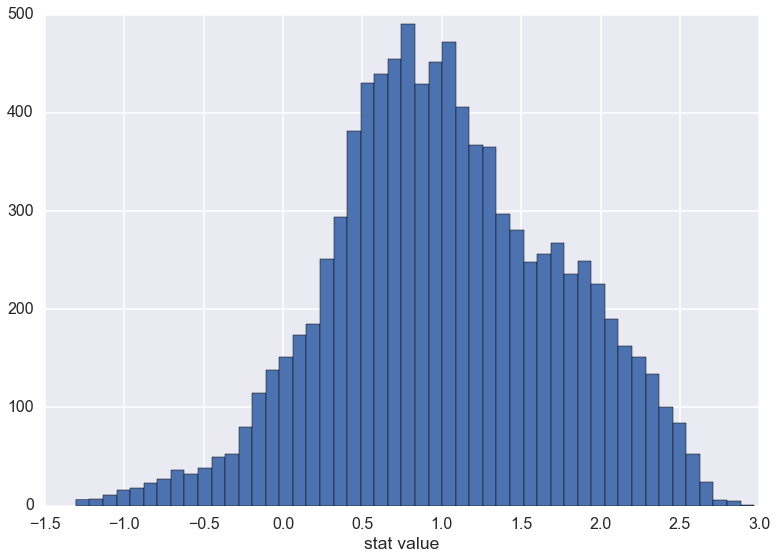

In [18]:
# look at the distribution of values on the stat map (we threshold out a large chunk around -1.5 here )
sns.set_context('poster')
plt.hist(data_map[np.where(data_map>-1.5)], bins=50);
plt.xlabel('stat value')

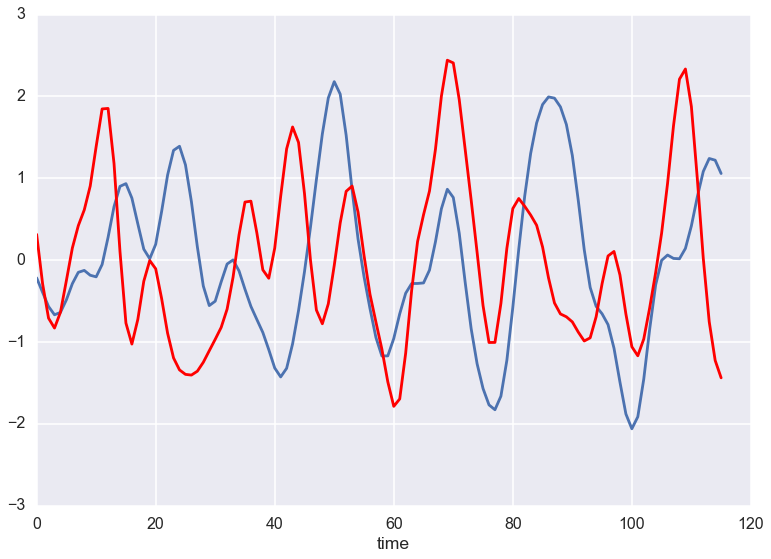

In [19]:
# plot the time series at two different nodes, as the data is not normalized so we do it here for plotting
plt.plot((data_rest[100,:]-np.mean(data_rest[100,:]))/np.std(data_rest[100,:]));
plt.plot((data_rest[200,:]-np.mean(data_rest[200,:]))/np.std(data_rest[200,:]), color='red');
plt.xlabel('time')

### *... on the brain!*

# Plotting surfaces in pure python

### Why?
* surfaces not created with Freesurfer
* avoiding mayavi dependency
* more control of colormaps etc.
* automatized figure production e.g. for quality control

https://github.com/juhuntenburg/nilearn/tree/enh/surface_plotting

* can handle pure numpy arrays (as dict)
* but also includes function to figure out data type for easy use of common formats (Freesurfer, gii, nii)

In [20]:
from nilearn import plotting

In [21]:
# create a mesh dictionary
mesh = {}
mesh['coords']=vertices_map
mesh['faces']=faces_map

#### Basic plotting

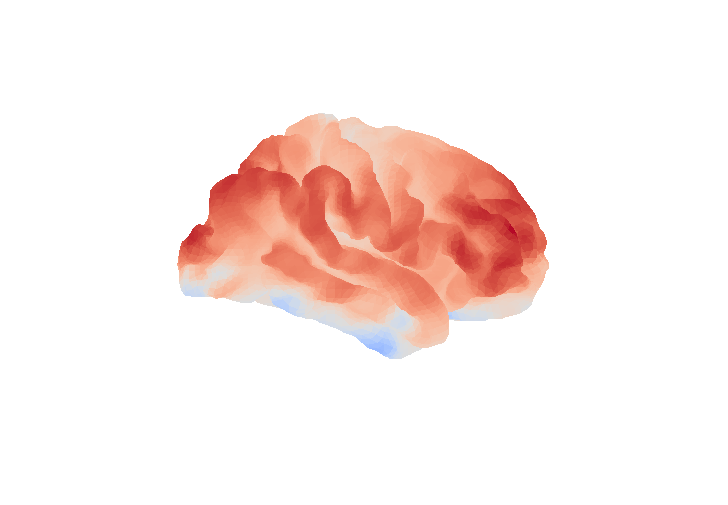

In [23]:
sns.set_style('white')
plot = plotting.plot_surf_stat_map(mesh, 'rh', stat_map=data_map)

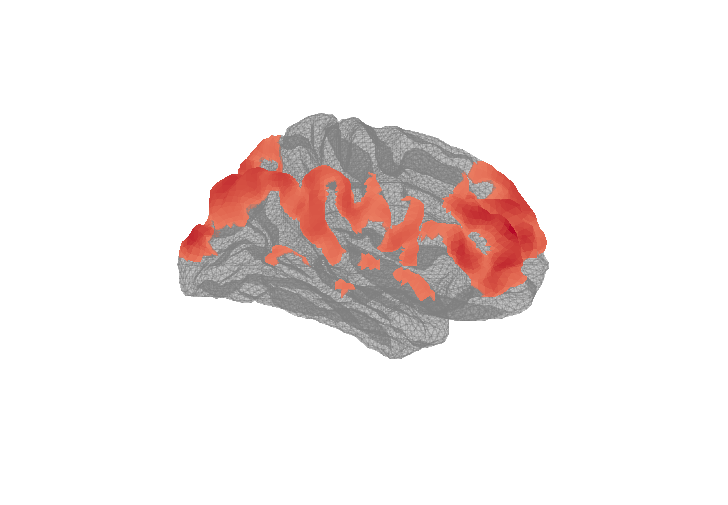

In [29]:
sns.set_style('white')
plot = plotting.plot_surf_stat_map(mesh, 'rh', stat_map=data_map, threshold=1.8, alpha=0.3)

#### Prettier plotting with sulcal depth map

In [30]:
# now we don't care about the data format, as long as we can read it into a numpy array
sulcal_depth_file = data_dir+'sulc_rh.npy'
sulc=np.load(sulcal_depth_file)

In [31]:
sulc.shape

(10242,)

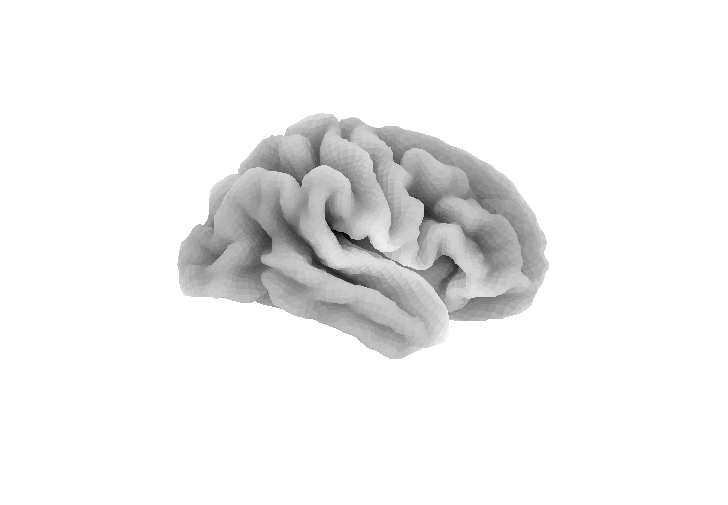

In [36]:
# the pure surface
plot = plotting.plot_surf_stat_map(mesh, 'rh', bg_map=sulc)

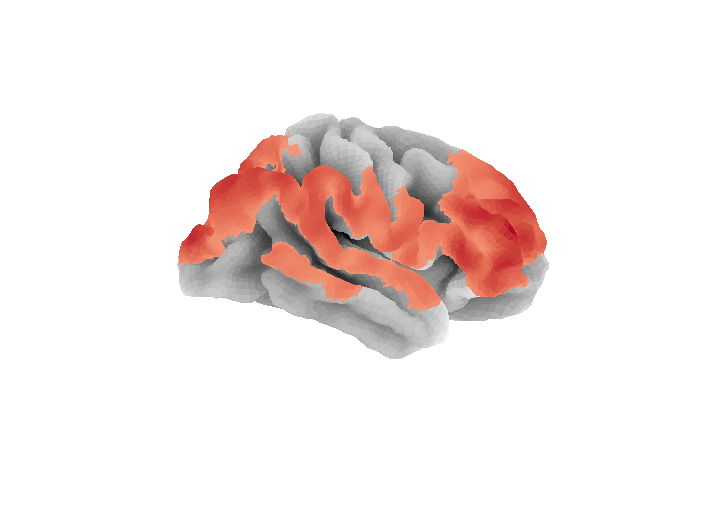

In [38]:
# with a thresholded stat map
plot = plotting.plot_surf_stat_map(mesh, 'rh', bg_map=sulc, stat_map=data_map, threshold=1.5)

#### Funkier plotting with inflated meshes

In [39]:
inflated_file = data_dir+'inflated_rh.vtk'
v_infl, f_infl, d_infl = read_vtk(inflated_file)
mesh_infl = {'coords':v_infl, 'faces':f_infl}

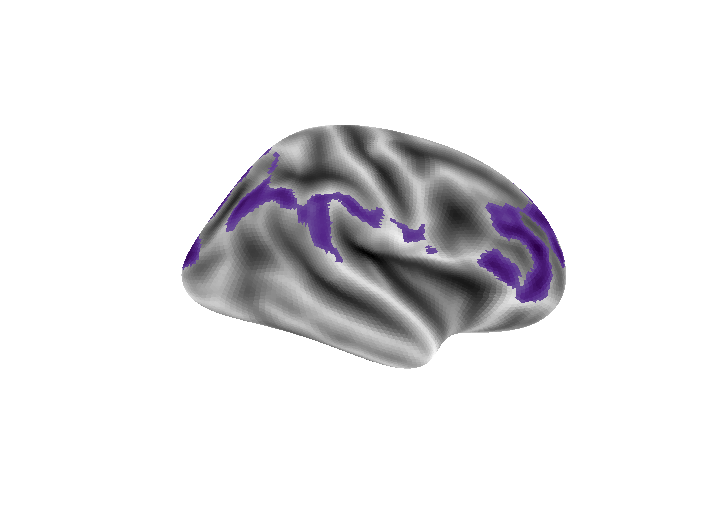

In [40]:
# as the inflated surface comes from the same mesh, we can plot the data form one on the other
plot = plotting.plot_surf_stat_map(mesh_infl, 'rh', bg_map=sulc, stat_map=data_map, threshold=2, cmap='PuOr')

### To do:
* Show colorbar
* Optimize elev / azimut for non-freesurfer surfaces
* Plotting rois / labels